This video is supporting code for my video - https://youtu.be/AIDo3GO9t5A

In [1]:
!pip install -U ipykernel

Requirement already up-to-date: ipykernel in /Users/alexzhang/anaconda3/lib/python3.7/site-packages (5.4.3)
You should consider upgrading via the '/Users/alexzhang/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install -q streamlit

You should consider upgrading via the '/Users/alexzhang/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pyngrok

You should consider upgrading via the '/Users/alexzhang/anaconda3/bin/python -m pip install --upgrade pip' command.


Update the token below from creating an account in ngrok website

You can ignore Ngrok step completely if you are not looking to expose your app to internet



In [4]:
!ngrok authtoken 1n7R0cFLO5VBmFJkuUw8wR63Goa_Q63ZfTeNJPbckzXv5BVV

Authtoken saved to configuration file: /Users/alexzhang/.ngrok2/ngrok.yml


In [5]:
%%writefile score.py
import pickle
import cv2 
import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import requests
from io import BytesIO
import os
import seaborn as sns
import matplotlib.pyplot as plt
st.set_page_config(page_title='Clock Drawing Test', initial_sidebar_state = 'auto')

st.set_option('deprecation.showfileUploaderEncoding', False)
st.title("Clock Image Classifier")

st.text("select clock Image for prediction")
hide_streamlit_style = """
            <style>
            #MainMenu {visibility: hidden;}
            footer {visibility: hidden;}
            </style>
            """
st.markdown(hide_streamlit_style, unsafe_allow_html=True) 
@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('./')
  return model

with st.spinner('Loading Model Into Memory....'):
  model = load_model()

classes=['demented','normal']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[128,128])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)



# st.title("Upload + Classification Example")
types= ["png","jpg"]
uploaded_file = st.file_uploader("Choose an image...", type=types )
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    

    image = image.convert("RGB")
    image = np.asarray(image, dtype=np.float32) / 255
    image = image[:, :, :3]
    image = cv2.resize(image, (128, 128))
    
    st.write("")
    st.write("Classifying...")
    res = model.predict(np.array([image]))
    st.write("likelihood for dementia:") 
    st.write(res[0][0]) 
    label =np.argmax(res,axis=1)
#     st.write(classes[label[0]]) 
    
    with open('hist.pkl','rb') as f:
         x = pickle.load(f)
    p = res[0][0]
    fig, ax = plt.subplots()
    ax=sns.distplot(x, hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = "likelihood for dementia")
    ax.axvline(p, 0,5)
    ax.text(p, 5, 'your score')
    st.pyplot(fig)

Overwriting score.py


In [6]:
!nohup streamlit run score.py &

OSError: Background processes not supported.

In [ ]:
from pyngrok import ngrok

!ngrok http 8528

7=ngrok by @inconshreveable                                       (Ctrl+C to quit)                                                                                Session Status                connecting                                        Version                       2.3.35                                            Region                        United States (us)                                Web Interface                 http://127.0.0.1:4040                                                                                                             Connections                   ttl     opn     rt1     rt5     p50     p90                                     0       0       0.00    0.00    0.00    0.00                                                                                                                                                                                                                                                                                        

200 OKGET static/js/38.74638a00.chunk.js      OST                                       PUupload_file/c5c86e4-a8a1-4bc7-a7ac-06128a3a4ae7/129.e9e1695a.chunk.jsjs/8.c93f4e8a.chunk.js                MooRegular.bee53c8c.ttfatic/media/IBMPlexSans-Bold.5a0eb98b.ttf20OK                 stream     11Switching Protocols200 OKmedia/b4218b8089cf2fc99d2e398285f322e65bfcf59b856      GET static/js/38.74638a00.chunk.jsOST                                       PUupload_file/c5c86e4-a8a1-4bc7-a7ac-06128a3a4ae7/129.e9e1695a.chunk.jsjs/8.c93f4e8a.chunk.js                MooRegular.bee53c8c.ttfatic/media/IBMPlexSans-Bold.5a0eb98b.ttf20OK                 200 OK73b061c43978aef7816406444db653801e20fca20c      media/b4218b8089cf2fc99d2e398285f322e65bfcf59b856GET static/js/38.74638a00.chunk.jsOST                                       PUupload_file/c5c86e4-a8a1-4bc7-a7ac-06128a3a4ae7/129.e9e1695a.chunk.jsjs/8.c93f4e8a.chunk.js                MooRegular.bee53c8c.ttf200 OK105354300.102162420627371685850432100801

102939.45 11876013121003PUuplod_file/c0c3e-3c9a-ce-bcae-9c495e25a3a/1                73b061c43978aef7816406444db653801e20fca20cGET medi/b4218b80869cf2fc99d2e398285f322e65bfcf59b856304 Not ModifiedOST                                       PUuplod_file/c43c0c3e-3c9a-40ce-bcae-9c49e5e25a3a/120OK                 stream 11Switching Protocolshalthz                                           73b061c43978aef7816406444db653801e20fca20cPUuplod_file/c0c3e-3c9a-ce-bcae-9c495e25a3a/1                73b061c43978aef7816406444db653801e20fca20cGET medi/b4218b80869cf2fc99d2e398285f322e65bfcf59b856304 Not ModifiedOST                                       PUuplod_file/c43c0c3e-3c9a-40ce-bcae-9c49e5e25a3a/120OK                 stream 11Switching Protocolshalthz                                           200 OK200 OK4OST                                             PUuplod_file/c0c3e-3c9a-ce-bcae-9c495e25a3a/1200 OK          73b061c43978aef7816406444db653801e20fca20cGET medi/b4218b80869cf2fc99d2e398285f322e65b

200 OK43153468569GET medi/8d093a90383e730e2eb7475aaa708c99bc2603b6fbfffbdf5407bad4.png      OST                                                        UT /c43c0c3e-3c9a-40ce-bcae-9c49e5e25a3a/169292825040089700OST                                                        PUuplod_file/c43c0c3e-3c9a-40ce-bcae-9c4e5e25a3a/169292825040089700e699470d0b9297fd383c4a9e994e6759fc7733ae4bbe0551afeed200 OK4cca2ddf25310b417d658131d87b901beec72e6f2cbccc5b914b458a      GET medi/8d093a90383e730e2eb7475aaa708c99bc2603b6fbfffbdf5407bad4.pngOST                                                        UT /c43c0c3e-3c9a-40ce-bcae-9c49e5e25a3a/169292825040089700OST                                                        PUuplod_file/c43c0c3e-3c9a-40ce-bcae-9c4e5e25a3a/169292825040089700200 OKPUuplod_file/c43c0c3e-3c9a-40ce-bcae-9c49e5e25a3a/169292825040089700      cca2ddf25310b417d658131d87b901beec72e6f2cbccc5b914b458aGET medi/8d093a90383e730e2eb7475aaa708c99bc2603b6fbfffbdf5407bad4.pngOST                       

In [64]:
image = Image.open("good.png")


image = image.convert("RGB")
image = np.asarray(image, dtype=np.float32) / 255
image = image[:, :, :3]
image = cv2.resize(image, (128, 128))

res = model.predict(np.array([image]))
print(res[0][0])
label =np.argmax(res,axis=1)
st.write(classes[label[0]]) 

0.3847488


In [66]:
import pickle

with open('hist.pkl','rb') as f:
     x = pickle.load(f)
p = res[0][0]
sns.distplot(x, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "likelihood for dementia")
plt.axvline(p, 0,5)
plt.text(p, 5, 'your score')
st.pyplot()

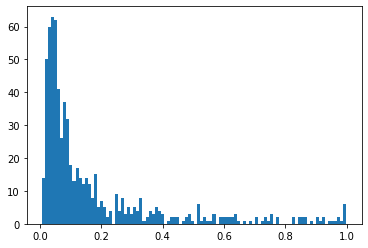

In [71]:
import matplotlib.pyplot as plt

plt.hist(x, bins = 100)
plt.show()

Text(1, 5, 'your score')

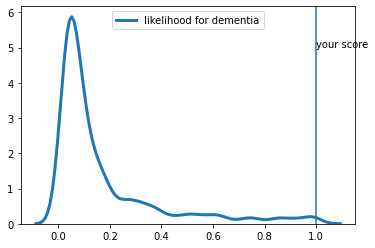

In [86]:
import seaborn as sns
p = 1
fig, ax = plt.subplots()
ax=sns.distplot(x, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "likelihood for dementia")
ax.axvline(p, 0,5)
ax.text(p, 5, 'your score')
# st.pyplot()